# Лабораторна робота №1
## Диференціальні рівняння
Сокирко Наталії, Комп'ютерна математика 1
## Варіант 6
# $y' = y^2 + y + x$



In [ ]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
from sympy import *

## Задача 1
1) Зобразити поле напрямків у точках $(m, \frac{n}{2})$,  $$m = -6, -5, \cdots, 6,$$  $$n = -6, -5, \cdots, 6$$.

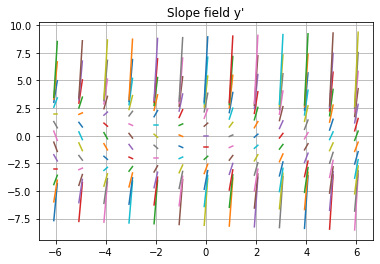

End of the program


In [16]:
# diff = y'= y^2+y+x
def diff(x,y):
    return y*y+y+x 

x = np.linspace(-6,6,13)
y = np.linspace(-6,6,13)

# use x,y
for j in x:
    for k in y:
        slope = diff(j,k)
        domain = np.linspace(j-0.07,j+0.07,2)
        def fun(x1,y1):
            z = slope*(domain-x1)+y1
            return z
        plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')

plt.title("Slope field y'")
plt.grid(True)
plt.show()
    
print("End of the program")

2) Описати аналітично та зобразити множину точок максимуму розвязків.

Множина розвязків y^2+y+x=0:

In [17]:
from sympy.abc import x, y
f = y*y + y + x
print(solve(f,y,dict=True))

[{y: -sqrt(1 - 4*x)/2 - 1/2}, {y: sqrt(1 - 4*x)/2 - 1/2}]


Побудуємо графік:

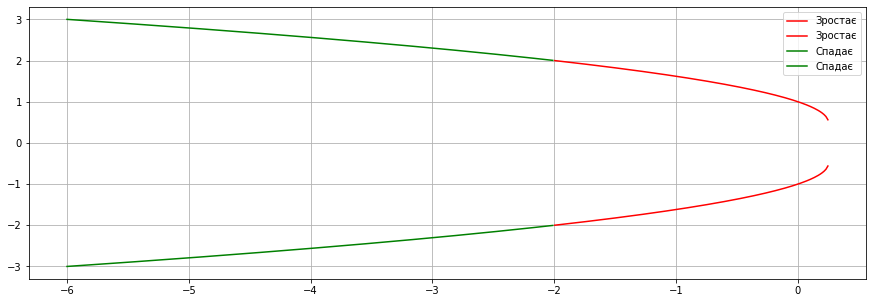

In [18]:
m = np.linspace(-6,10,1000)
plt.figure(figsize=(15,5))
n1 = -np.sqrt(1-4*m)/2-1/2
n2 = np.sqrt(1-4*m)/2-1/2
filt1 = m - n1 > 0
plt.plot(m[filt1],n1[filt1],'r', label = "Зростає")
plt.plot(m[filt1],-n1[filt1],'r', label = "Зростає")
filt1 = m - n1 < 0
plt.plot(m[filt1],n1[filt1],color='green', label = "Спадає")
plt.plot(m[filt1],-n1[filt1],color='green', label = "Спадає")
plt.grid(True)
plt.legend()
plt.show()

Точка максимуму знаходиться в точці (0.5, 0). Множина розвязків: $$\large\{(x,y) | x\in\mathbb{R},y=0\}$$

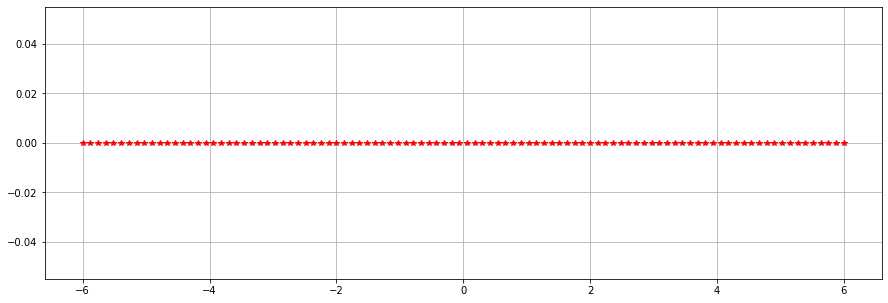

In [19]:
plt.figure(figsize=(15,5))
x = np.linspace(-6, 6, 100)
y = np.linspace(0, 0, 100)
plt.plot(x,y,'r*')
plt.grid()
plt.show()

3) Зобразити ізокліни, які характеризуються кутовими коефіцієнтами  $k = \{ \pm \frac{1}{2}, \pm1, \pm3 \}$

Розв'яжемо рівняння $f(x,y) = k$.


In [ ]:
from sympy.abc import x,y,k
f = y*y + y + x
print(solve(f-k,y,dict=True))

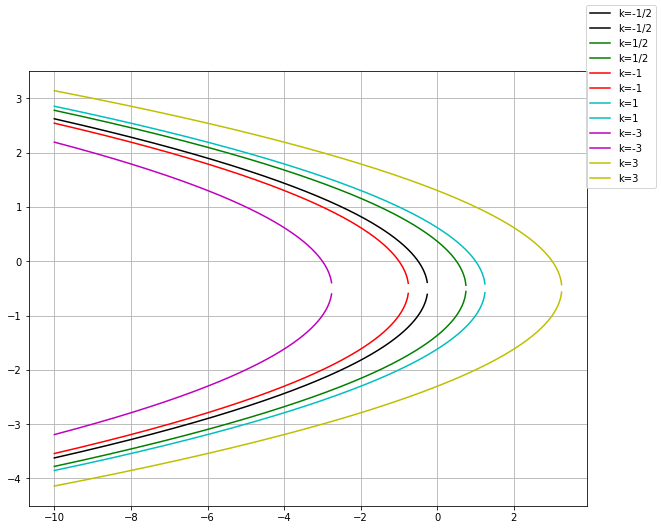

In [21]:
def f1(x,k):
    return np.sqrt(4*k-4*x+1)/2-1/2

def f2(x,k):
    return -np.sqrt(4*k-4*x+1)/2-1/2

col = ['k-', 'g-', 'r-', 'c-', 'm-', 'y-']
A = plt.figure(figsize = (10,8))
m = np.linspace(-10,6,1000)
plt.plot(m, f1(m, -1/2),col[0], m, f2(m, -1/2), col[0], label="k=-1/2")
plt.plot(m, f1(m, 1/2),col[1], m, f2(m, 1/2), col[1], label="k=1/2")
plt.plot(m, f1(m, -1),col[2], m, f2(m, -1), col[2], label="k=-1")
plt.plot(m, f1(m, 1),col[3], m, f2(m, 1), col[3], label="k=1")
plt.plot(m, f1(m, -3),col[4], m, f2(m, -3), col[4], label="k=-3")
plt.plot(m, f1(m, 3),col[5], m, f2(m, 3), col[5], label="k=3")
A.legend()
plt.grid(True)
plt.show()

4) Зобразити області, де інтегральні криві зростають, та області, де інтегральні криві спадають. 

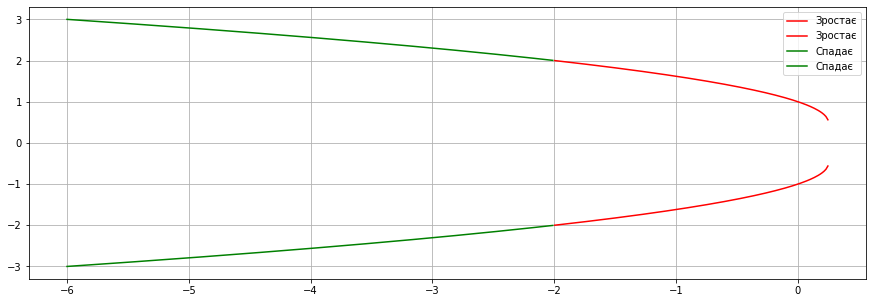

In [22]:
m = np.linspace(-6,10,1000)
plt.figure(figsize=(15,5))
n1 = -np.sqrt(1-4*m)/2-1/2
n2 = np.sqrt(1-4*m)/2-1/2
filt1 = m - n1 > 0
plt.plot(m[filt1],n1[filt1],'r', label = "Зростає")
plt.plot(m[filt1],-n1[filt1],'r', label = "Зростає")
filt1 = m - n1 < 0
plt.plot(m[filt1],n1[filt1],color='green', label = "Спадає")
plt.plot(m[filt1],-n1[filt1],color='green', label = "Спадає")
plt.grid(True)
plt.legend()
plt.show()

5) Описати аналітично та зобразити множину точок перегину інтегральних кривих.
$$y^\prime =  y^2 + y + x$$
$$y^{\prime\prime} =  2y^3 +3y^2 + 2xy + y + x + 1 = 0$$
$$\frac{2y^3 + 3y^2 + y + 1}{2y + 1} = x$$

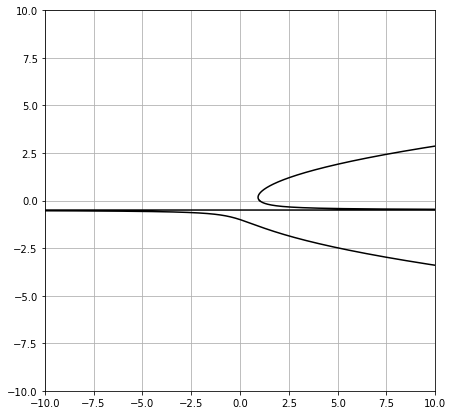

In [23]:
def func(y):
    return (2*y**3+2*y**2+y+1)/(2*y+1)

N = np.linspace(1/10000,10,10000)
M = np.linspace(-10,-1/10000,10000)
plt.figure(figsize = (7,7))
plt.plot(func(N),N,'k',func(M),M,'k')
plt.axis([-10, 10, -10, 10])
plt.grid(True)
plt.show()

6) Виділити області, де інтегральні криві опуклі вгору.

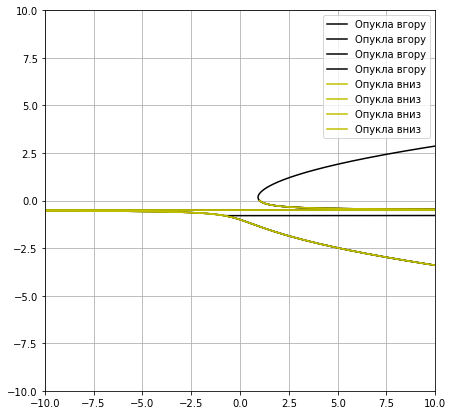

In [24]:
def func(y):
    return (2*y**3+2*y**2+y+1)/(2*y+1)

N = np.linspace(1/10000,10,10000)
M = np.linspace(-10,-1/10000,10000)
plt.figure(figsize = (7,7))
c1 = func(N) - N > 0
c2 = func(M) - M > 0
plt.plot(func(N)[c1],N[c1],'k',func(M),M,'k', label = "Опукла вгору")
plt.plot(func(M)[c2],M[c2],'k',func(M),M,'k', label = "Опукла вгору")
c1 = func(N) - N < 0
c2 = func(M) - M < 0
plt.plot(func(N)[c1],N[c1],'y',func(M),M,'y',label = "Опукла вниз")
plt.plot(func(M)[c2],M[c2],'y',func(M),M,'y', label = "Опукла вниз")
plt.legend()
plt.axis([-10, 10, -10, 10])
plt.grid(True)
plt.show()

7) Зобразити наближено інтегральні криві, які проходять через точки (0, -2), (0, 0), (0, 1) відповідно.\
$$\frac{sqrt(4k - 4x + 1)}{2} - 1/2 = y, x = 0$$
$$\frac{sqrt(4k + 1)}{2} - 1/2 = -2$$
$$k1 = 2, k2 = 0.$$


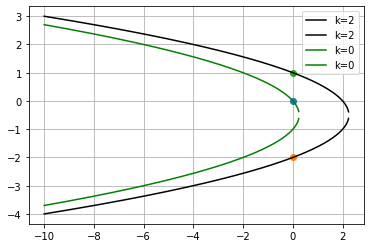

In [25]:
def f(x,k):
    return np.sqrt(4*k-4*x+1)/2-1/2

def func(x,k):
    return -np.sqrt(4*k-4*x+1)/2-1/2

plt.plot([0],[0],'o',[0],[-2],'o',[0],[1],'o') 
col = ['k-', 'g-', 'r-', 'c-', 'm-', 'y-']
m = np.linspace(-10,6,1000)
plt.plot(m, f(m, 2),col[0], m, func(m, 2), col[0], label="k=2")
plt.plot(m, f(m, 0),col[1], m, func(m, 0), col[1], label="k=0")
plt.legend()    
plt.grid(True)
plt.show()


## Задача 2
# $g(y) = 2y - y^2 +3$
1) Зобразити векторне поле в точках {${0, +/-1, +/-2, +/-3, +/-4}$}

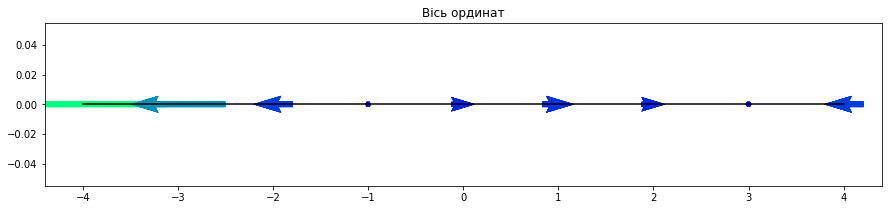

In [26]:
def fun(P, t=0):
    return [P[0],P[1]*2 - P[1]*P[1] + 3]

np.seterr(divide='ignore', invalid='ignore')
plt.figure(figsize = (15,3))
x = np.linspace(0, 0, 9)
y = np.linspace(-4, 4, 9)
X1 , Y1 = np.meshgrid(x,y)
DX1, DY1 = fun([X1, Y1])
M = (np.hypot(DX1, DY1))
plt.title('Вісь ординат')
Q = plt.quiver(Y1, X1, DY1, DX1, M, pivot='middle', cmap=plt.cm.winter)
x = np.linspace(-4, 4, 1000)
y = np.linspace(0, 0, 1000)
plt.plot(x, y,color='k')
plt.show()

2) Знайти області зростання і спадання, множину точок перегину інтегральних кривих заданого рівня.\
$g(y) = 2y - y^2 + 3 = 0 => y1 = -1, y2 = 3$\
$g'(y) = 2 - 2y = 0 => y = 1$\
Екстремуми:       $y: -1, y: 3$\
Функція зростає на проміжках:  $(y\in(-\infty, -1) \cup  (3, -\infty))$\
Функція спадає на проміжку:  $(y \in (-1, 3))$\
Множина точок перегину:  $\left [ -1, 1, 3 \right ]$.

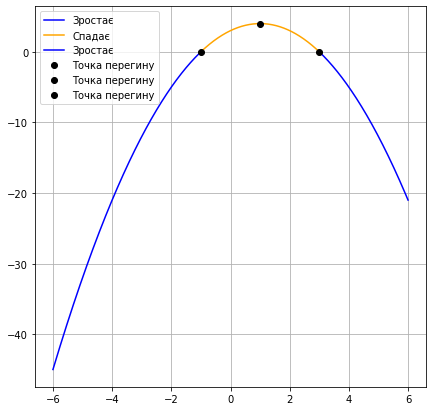

In [27]:
def func(y):
    return 2*y - y*y + 3

plt.figure(figsize = (7,7))
int_1 = np.linspace(-6, -1, 400)
int_2 = np.linspace(-1, 3, 400)
int_3 = np.linspace(3, 6, 400)
plt.plot(int_1,func(int_1),'b', label = "Зростає")
plt.plot(int_2,func(int_2),'orange', label = "Спадає")
plt.plot(int_3,func(int_3),color='b', label = "Зростає")
plt.plot([-1],[func(-1)],'ko',[1],[func(1)],'ko',[3],[func(3)],'ko', label = 'Точка перегину')
plt.grid(True)
plt.legend()
plt.show()

3) Знайти явний вигляд $g(x, y_{0}), x\in I_{y_{0}}$ - і непродовжуваного розв'язку заданого рівняння такого, що $y(0, y_{0})= y_{0}$. У разі наявності вертикальних асимптот, вказати точки, через які вони проходять, а відтак, знайти явний вигляд інтегралу $I_{y_{0}}$. Для $y_{0}\in |y_{1}, y_{2}|, y_{0} \in (y_{2}), +\infty )$($y_{1}, y_{2}$ - нулі функції $g(y)$, розташовані в порядку зростання) зобразити графік функції $g(x, y_{0})$.
$$\frac{dy}{dx}=2y - y^2 +3$$
$$\frac{dy}{2y - y^2 +3}=dx$$
$$\int \frac{dy}{2y - y^2 +3}=\int dx$$

In [31]:
from sympy.abc import x, y
g = -2*y - y**2 + 3
integrate(1/g, y)

-log(y - 1)/4 + log(y + 3)/4

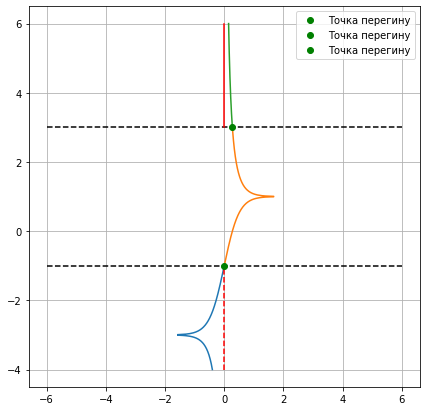

In [32]:
def func(y):
    return (np.log(np.abs(y+3)/np.abs(y-1)))/4

plt.figure(figsize=(7,7))
x = np.linspace(-12, 12, 400)
y = np.linspace(-12, 12, 400)
y = np.linspace(-4,-1, 400)
plt.plot(func(y), y)
y = np.linspace(-1, 3, 400)
plt.plot(func(y), y,)
y = np.linspace(3,6, 400)
plt.plot(func(y), y,)
x = np.linspace(-6, 6, 400)
y = np.linspace(-1, -1, 400)
plt.plot(x, y,'k--')
x = np.linspace(-6, 6, 400)
y = np.linspace(3, 3, 400)
plt.plot(x, y,'k--')
x = np.linspace(0, 0, 400)
y1 = np.linspace(-4, -1, 400)
y2 = np.linspace(3, 6, 400)
plt.plot(x, y1,'r--',x, y2,'r-')
plt.plot([func(-1)],[-1],'go',[func(1)],[1],'go',[func(3)],[3],'go', label = 'Точка перегину')
plt.legend()
plt.grid(True)
plt.show()

4) Нехай $I=(a, b), J=(b,c)$ - інтервали зростання і спадання інтегральних кривих заданого рівняння, відповідно. Зобразити графіки функцій $y(x,b+\frac{1}{2})$ та $y(x,b-\frac{1}{2}$ для $x\geqslant0$. Знайти $x\geqslant0$ таке, що $|y(x, b+\frac{1}{2})-y(x, b-\frac{1}{2})|<10^{-3}$.

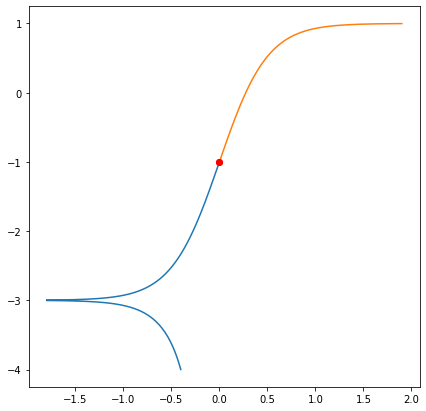

True


In [33]:
def func(y):
    return (np.log(np.abs(y+3)/np.abs(y-1)))/4

x = np.linspace(0, 5, 400)
y = np.linspace(-1-1/2, -1-1/2, 400)
plt.figure(figsize=(7,7))
y = np.linspace(-4,-1, 1000)
plt.plot(func(y), y)
y = np.linspace(1,-1, 1000)
plt.plot(func(y), y)
ans = np.abs(func(np.linspace(-4,-1, 1000))-func(np.linspace(1,-1, 1000))) < 10**(-3)
plt.plot(func(y)[ans],y[ans],'ro')
y = np.linspace(-4,-1, 1000)
plt.plot(func(y)[ans],y[ans],'ro')
plt.show()
print(np.any(ans))